# Pivot tables
- Pivoting of data is the process of aggregating data across two or more categorical variables.
- Closely related are:
    - Group by, where the number of categorical variables is flexible.
    - Cross tabulation, which is basically pivoting, but with different defaults and parameters.
- In [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html), pivot tables are based on
    - _values_: what to aggregate
    - _index_ and _column_: layout of result, and
    - _aggfunc_: how to aggregate.

## Sales data from Power BI examples

In [1]:
# Read SalesData.xlsx
import pandas as pd
df = pd.read_excel('../../data/SalesData.xlsx', skiprows=4, header=0)
print(df.shape)
df.head()

(260096, 10)


,OrderDate,OrderNumber,ProductKey,SalespersonKey,Salesperson,Supervisor,Manager,Channel,Quantity,UnitPrice
0,2019-01-12,1492762,1420,265,Julio Lima,Diogo Carvalho,Gabriel Azevedo,Distributor,6,4.44
1,2019-01-12,1492762,1073,265,Julio Lima,Diogo Carvalho,Gabriel Azevedo,Distributor,6,8.83
2,2019-01-12,1492762,264,265,Julio Lima,Diogo Carvalho,Gabriel Azevedo,Distributor,10,0.96
3,2019-01-13,1492719,1154,265,Julio Lima,Diogo Carvalho,Gabriel Azevedo,Distributor,6,2.92
4,2019-01-13,1492719,1527,265,Julio Lima,Diogo Carvalho,Gabriel Azevedo,Distributor,6,2.81


In [2]:
# Add a column giving the total price
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,OrderDate,OrderNumber,ProductKey,SalespersonKey,Salesperson,Supervisor,Manager,Channel,Quantity,UnitPrice,TotalPrice
0,2019-01-12,1492762,1420,265,Julio Lima,Diogo Carvalho,Gabriel Azevedo,Distributor,6,4.44,26.64
1,2019-01-12,1492762,1073,265,Julio Lima,Diogo Carvalho,Gabriel Azevedo,Distributor,6,8.83,52.98
2,2019-01-12,1492762,264,265,Julio Lima,Diogo Carvalho,Gabriel Azevedo,Distributor,10,0.96,9.60
3,2019-01-13,1492719,1154,265,Julio Lima,Diogo Carvalho,Gabriel Azevedo,Distributor,6,2.92,17.52
4,2019-01-13,1492719,1527,265,Julio Lima,Diogo Carvalho,Gabriel Azevedo,Distributor,6,2.81,16.86


In [3]:
# Use Pandas groupby() to group by Channel and sum the TotalPrice
df1 = df.groupby('Channel')['TotalPrice'].sum()
df1

Channel
Distributor    6098515.78
Online         3113650.20
Retail         8697066.51
Name: TotalPrice, dtype: float64

In [4]:
# Use Pandas pivot_table() to group by Channel and Manager and sum the TotalPrice
df2 = df.pivot_table(index='Channel', columns='Salesperson', values='TotalPrice', aggfunc='sum')
df2

Salesperson,Carla Ferreira,Estevan Souza,Felipe Goncalves,Gustavo Barros,Gustavo Gomes,Isabella Sousa,Julia Silva,Julieta Gomes,Julio Lima,Kaua Araujo,Leonardo Cardoso,Mateus Costa
Channel,,,,,,,,,,,,
Distributor,NaN,349897.22,NaN,NaN,2447136.24,NaN,NaN,NaN,3301482.32,NaN,NaN,NaN
Online,NaN,NaN,1676337.1,NaN,NaN,NaN,652072.53,NaN,NaN,NaN,NaN,785240.57
Retail,4707402.55,NaN,NaN,664172.3,NaN,870301.84,NaN,26053.51,NaN,821424.61,1607711.7,NaN


In [5]:
# Exchange aggfunc='sum' for aggfunc='count' to confirm that the dataset is not very suitable for this type of analysis
df2 = df.pivot_table(index='Channel', columns='Salesperson', values='TotalPrice', aggfunc='count')
df2

Salesperson,Carla Ferreira,Estevan Souza,Felipe Goncalves,Gustavo Barros,Gustavo Gomes,Isabella Sousa,Julia Silva,Julieta Gomes,Julio Lima,Kaua Araujo,Leonardo Cardoso,Mateus Costa
Channel,,,,,,,,,,,,
Distributor,NaN,6555.0,NaN,NaN,33265.0,NaN,NaN,NaN,51765.0,NaN,NaN,NaN
Online,NaN,NaN,31508.0,NaN,NaN,NaN,15012.0,NaN,NaN,NaN,NaN,12922.0
Retail,60642.0,NaN,NaN,12098.0,NaN,7033.0,NaN,215.0,NaN,6510.0,22571.0,NaN


## Olympic athletes and results
- [Kaggle dataset](https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results/) scraped from [www.sports-reference.com/](http://www.sports-reference.com/)

In [6]:
# Read the athlete_events.csv file
import pandas as pd
athletes = pd.read_csv('../../data/athlete_events.csv')
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
# Check average weight of athletes
athlete_weight = athletes['Weight'].mean()

# Print athlete_weight with 2 decimal places and kg suffix
print('Average weight of athletes: {:.2f} kg'.format(athlete_weight))

Average weight of athletes: 70.70 kg


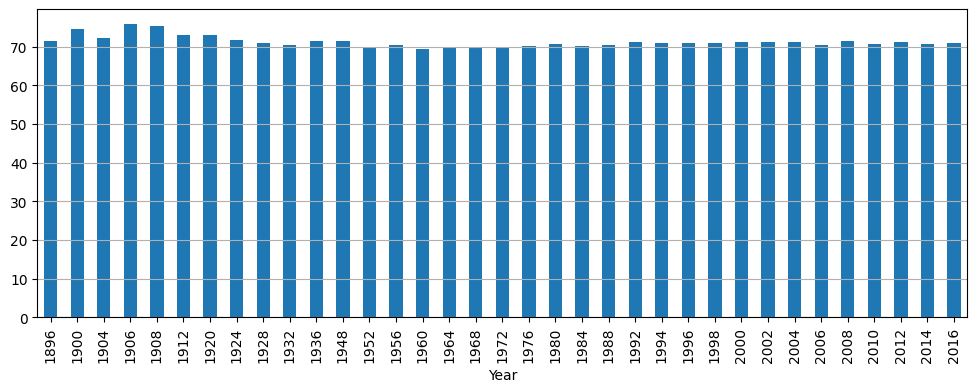

In [8]:
# Check average weight of athletes for each year
athlete_weight_by_year = athletes.groupby('Year')['Weight'].mean()

# Plot athlete_weight_by_year using kind='bar'
import matplotlib.pyplot as plt
athlete_weight_by_year.plot(kind='bar', figsize=(12, 4))
# Add horizontal grid lines to the plot
plt.grid(axis='y') 
plt.show()

In [9]:
# Check average weight of athletes for each sport and drop NA values
athlete_weight_by_sport = athletes.groupby('Sport')['Weight'].mean().dropna()
athlete_weight_by_sport

Sport
Alpine Skiing                72.068110
Archery                      70.011135
Art Competitions             75.290909
Athletics                    69.249287
Badminton                    68.171439
Baseball                     85.707792
Basketball                   85.777053
Beach Volleyball             79.089219
Biathlon                     66.631419
Bobsleigh                    89.250678
Boxing                       65.249890
Canoeing                     76.492615
Cross Country Skiing         65.877670
Curling                      72.131707
Cycling                      70.067944
Diving                       60.572741
Equestrianism                67.803975
Fencing                      71.387538
Figure Skating               59.543651
Football                     70.446834
Freestyle Skiing             67.026835
Golf                         71.194444
Gymnastics                   56.916553
Handball                     81.497151
Hockey                       69.169909
Ice Hockey         

In [10]:
# Make a pivot table of athlete weights by sport and year
athlete_weight_sport_year = athletes.pivot_table(index='Sport', columns='Year', values='Weight', aggfunc='mean')
athlete_weight_sport_year

Year,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,...,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
Sport,,,,,,,,,,,,,,,,,,,,,
Alpine Skiing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75.080645,NaN,75.906872,NaN,75.672104,NaN,75.334802,NaN,74.851455,NaN
Archery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,70.151961,NaN,70.391509,NaN,72.683938,NaN,71.795000,NaN,72.232323
Art Competitions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.333333,86.500000,73.955556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Athletics,70.068966,74.526316,73.714286,74.739726,73.819444,72.239960,71.402913,69.778533,69.838565,70.306452,...,NaN,69.710613,NaN,69.894204,NaN,69.446746,NaN,68.939536,NaN,67.385732
Badminton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,67.475556,NaN,68.132500,NaN,67.885246,NaN,68.016667,NaN,68.970588
Baseball,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,85.476190,NaN,88.026178,NaN,88.239474,NaN,NaN,NaN,NaN
Basketball,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,86.639860,NaN,86.857143,NaN,87.195652,NaN,87.409894,NaN,87.867857
Beach Volleyball,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,78.718750,NaN,79.520833,NaN,79.875000,NaN,79.505263,NaN,78.583333
Biathlon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,65.912833,NaN,65.627660,NaN,65.083587,NaN,65.147877,NaN,65.371148,NaN


In [11]:
# Extract the rows for Season == Summer and Year >= 2000
summer = athletes.loc[athletes['Season'] == 'Summer',:]
summer2000 = summer.loc[summer['Year'] >= 2000,:]
summer2000.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,NaN
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN
57,18,Timo Antero Aaltonen,M,31.0,189.0,130.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Shot Put,NaN
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold


In [12]:
# Repeat the pivoting step on the summer2000 data
awsy = summer2000.pivot_table(index='Sport', columns='Year', values='Weight', aggfunc='mean')

# Remove rows that only contain NaN values
awsy = awsy.dropna(how='all')
awsy.round(1)

Year,2000,2004,2008,2012,2016
Sport,,,,,
Archery,70.2,70.4,72.7,71.8,72.2
Athletics,69.7,69.9,69.4,68.9,67.4
Badminton,67.5,68.1,67.9,68.0,69.0
Baseball,85.5,88.0,88.2,NaN,NaN
Basketball,86.6,86.9,87.2,87.4,87.9
Beach Volleyball,78.7,79.5,79.9,79.5,78.6
Boxing,66.1,66.1,66.4,67.2,66.6
Canoeing,78.0,77.7,78.0,76.3,77.0
Cycling,69.8,69.5,69.9,69.2,68.4


### Aggregate on multiple functions and/or values

In [13]:
# Repeat, but limit to summers of 2000-2016
awsy = summer2000.pivot_table(index='Sport', columns='Year', values=['Weight','Height'], aggfunc=['mean','max'])

# Remove rows that only contain NaN values
awsy = awsy.dropna(how='all')
awsy.round(1).head()

mean                                                             \
           Height                             Weight                           
Year         2000   2004   2008   2012   2016   2000  2004  2008  2012  2016   
Sport                                                                          
Archery     174.1  173.7  173.3  173.3  173.4   70.2  70.4  72.7  71.8  72.2   
Athletics   176.5  176.3  176.0  176.1  175.2   69.7  69.9  69.4  68.9  67.4   
Badminton   173.9  173.6  173.7  174.3  174.5   67.5  68.1  67.9  68.0  69.0   
Baseball    182.4  183.5  183.8    NaN    NaN   85.5  88.0  88.2   NaN   NaN   
Basketball  191.0  191.6  191.7  192.4  191.9   86.6  86.9  87.2  87.4  87.9   

              max                                                          \
           Height                             Weight                        
Year         2000   2004   2008   2012   2016   2000   2004   2008   2012   
Sport                                                                       
Archery     197.0  197.0  193.0  194.0  194.0  113.0  115.0  100.0  115.0   
Athletics   205.0  207.0  206.0  208.0  208.0  165.0  165.0  165.0  160.0   
Badminton   199.0  193.0  195.0  201.0  201.0   90.0   89.0   96.0   93.0   
Baseball    206.0  201.0  198.0    NaN    NaN  110.0  112.0  120.0    NaN   
Basketball  226.0  226.0  226.0  221.0  218.0  141.0  141.0  156.0  125.0   

                   
                   
Year         2016  
Sport              
Archery     130.0  
Athletics   165.0  
Badminton    93.0  
Baseball      NaN  
Basketball  137.0

In [14]:
# Repeat, but add margins
awsy = summer2000.pivot_table(index='Sport', columns='Year', values=['Weight','Height'], aggfunc='max', margins=True)

# Remove rows that only contain NaN values
awsy = awsy.dropna(how='all')
awsy.round(1).head()

Height                                    Weight                \
Year         2000   2004   2008   2012   2016    All   2000   2004   2008   
Sport                                                                       
Archery     197.0  197.0  193.0  194.0  194.0  197.0  113.0  115.0  100.0   
Athletics   205.0  207.0  206.0  208.0  208.0  208.0  165.0  165.0  165.0   
Badminton   199.0  193.0  195.0  201.0  201.0  201.0   90.0   89.0   96.0   
Baseball    206.0  201.0  198.0    NaN    NaN  206.0  110.0  112.0  120.0   
Basketball  226.0  226.0  226.0  221.0  218.0  226.0  141.0  141.0  156.0   

                                 
Year         2012   2016    All  
Sport                            
Archery     115.0  130.0  130.0  
Athletics   160.0  165.0  165.0  
Badminton    93.0   93.0   96.0  
Baseball      NaN    NaN  120.0  
Basketball  125.0  137.0  156.0

### Stack and unstack
- These operations switch between the groupby-format and the pivot_table-format.

In [15]:
# Groupby with two columns
athlete_weight_by_sport_groupby = athletes.groupby('Sport')[['Weight','Height']].mean()
athlete_weight_by_sport_groupby

,Weight,Height
Sport,,
Aeronautics,NaN,NaN
Alpine Skiing,72.068110,173.489052
Alpinism,NaN,NaN
Archery,70.011135,173.203085
Art Competitions,75.290909,174.644068
...,...,...
Tug-Of-War,95.615385,182.480000
Volleyball,78.900214,186.994822
Water Polo,84.566446,184.834648


In [16]:
# Unstack the result
athlete_weight_by_sport_groupby.unstack()

        Sport           
Weight  Aeronautics                NaN
        Alpine Skiing        72.068110
        Alpinism                   NaN
        Archery              70.011135
        Art Competitions     75.290909
                               ...    
Height  Tug-Of-War          182.480000
        Volleyball          186.994822
        Water Polo          184.834648
        Weightlifting       167.824801
        Wrestling           172.358586
Length: 132, dtype: float64

## Exercise
- Extract winter olympics.
- Make yearly medal statistics for all countries using pivoting to count medals.
    - Remove all countries that have no winter olympic medals.
- Extract the top 10 countries that have the most winter olympic medals in sum.
- Use the _noc\_regions.csv_ to exchange the NOC codes with region names.
- Plot the resulting 10 curves as proportions of medals per year.
    - Place the legend outside the plot

```{seealso} Resources
:class: tip
- [Pandas' group by](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)
- [Pandas' cross tabulation](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html)
- [Pandas' pivot table](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)
- [Kaggle dataset: Olympic athletes](https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results/) scraped from [www.sports-reference.com/](http://www.sports-reference.com/)
- [YouTube: Pivot tables with Pandas](https://youtu.be/ETQXKwM6YMY?si=nnBpRENvqnhZYL_e) (8m:59s)
```